In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/olakunlealabi/Downloads/supermarket_marketing/Supermarket_CustomerMembers.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head(10))

# Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score 

## Cleaning the Data by encoding the gender into numerical values

In [6]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 690.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 7.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 5.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Genre' column
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

print(data.head(10))

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40
5           6      0   22                  17                      76
6           7      0   35                  18                       6
7           8      0   23                  18                      94
8           9      1   64                  19                       3
9          10      0   30                  19                      72


## Normalize Numerical Features

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

print(data.head())


   CustomerID  Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1      1 -1.424569           -1.738999               -0.434801
1           2      1 -1.281035           -1.738999                1.195704
2           3      0 -1.352802           -1.700830               -1.715913
3           4      0 -1.137502           -1.700830                1.040418
4           5      0 -0.563369           -1.662660               -0.395980


## Exploratory Data Analysis (EDA)

In [11]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


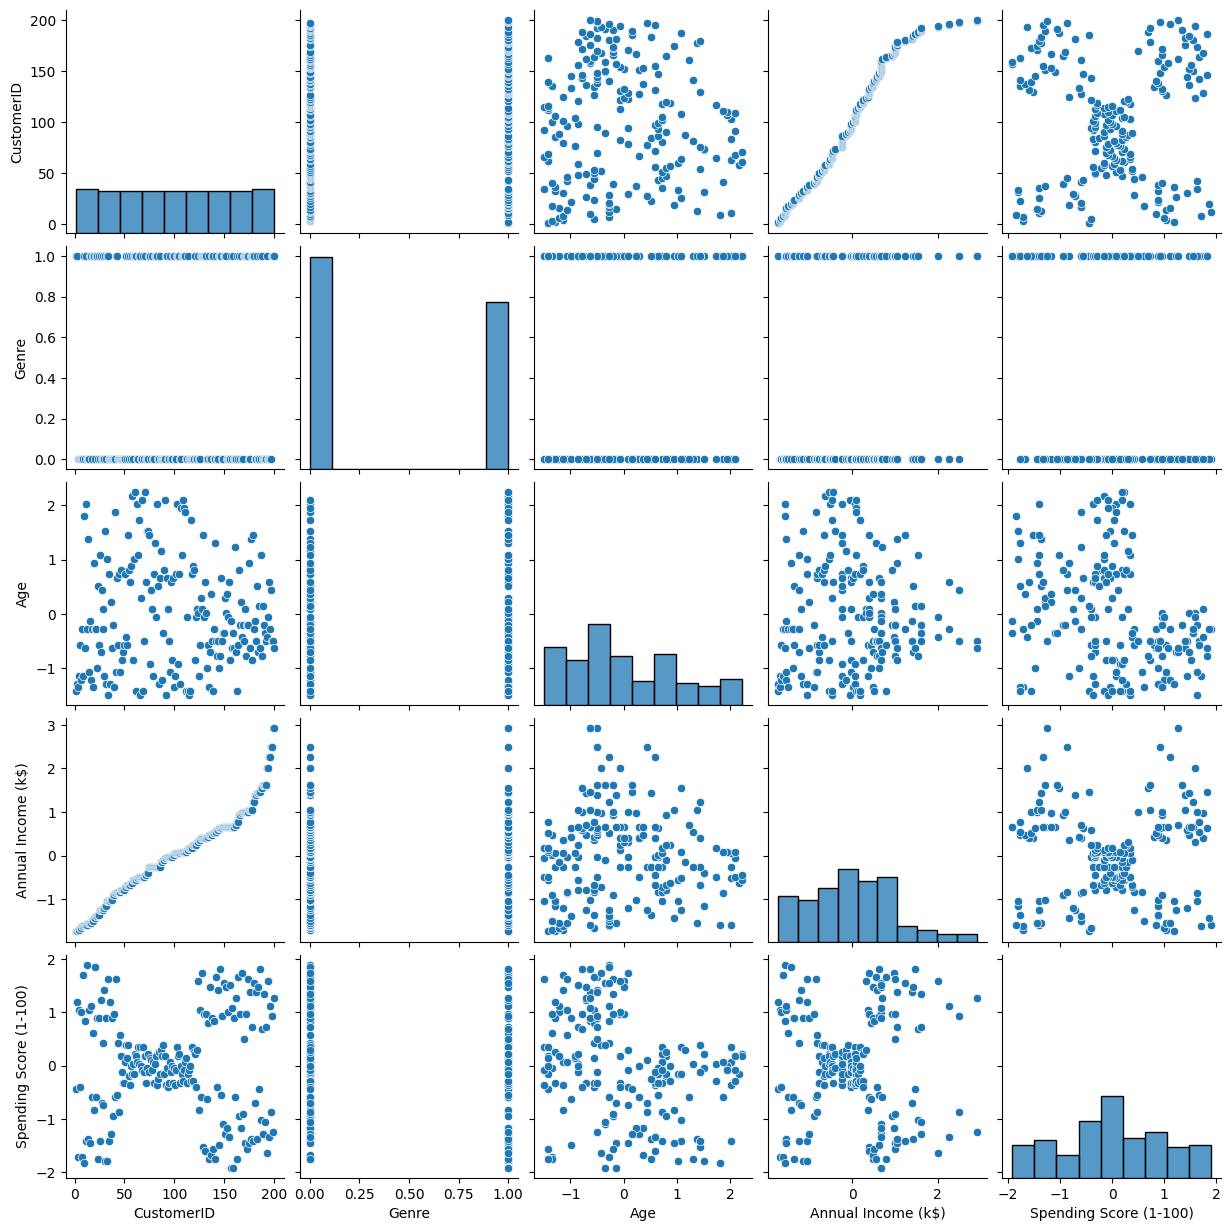

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()


## Train a Predictive Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Features and target
X = data.drop(['CustomerID', 'Spending Score (1-100)'], axis=1)
y = data['Spending Score (1-100)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Absolute Error: 0.4765875521105135
Mean Squared Error: 0.6832951260355129
R-Squared: 0.08081262260343125


## Feature Engineering

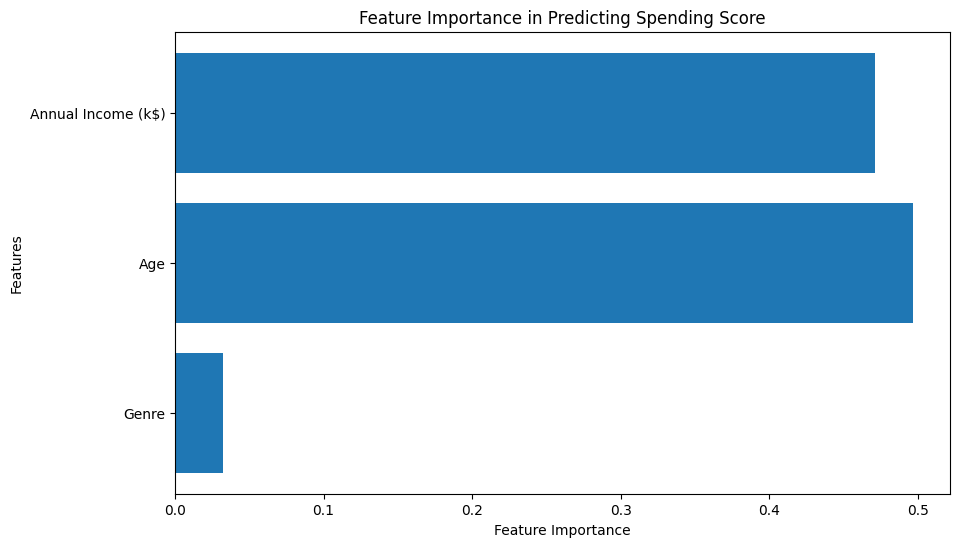

In [14]:
import numpy as np

# Feature importance
importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(features)), importance, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Spending Score')
plt.show()
